<a href="https://colab.research.google.com/github/rajashekarv95/Autoencoders/blob/master/Unsupervised_Pretraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt


import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
from torch.utils.data import DataLoader

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [3]:
train_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw



Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw


Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/FashionMNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [37]:
test_set = torchvision.datasets.FashionMNIST(
    root = './data/FashionMNIST',
    train = False,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()                                 
    ])
)

In [38]:
test_set

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data/FashionMNIST
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [6]:
dataloader = DataLoader(train_set, batch_size=50, shuffle=True)
dataloader_test = DataLoader(test_set, batch_size=10000, shuffle=True)


In [8]:
for data in dataloader:
  print(data[0].shape)
  print(torch.reshape(data[0], (-1, 784)))
  trial = torch.reshape(data[0], (-1, 784))
  break

torch.Size([50, 1, 28, 28])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


In [9]:
trial.shape

torch.Size([50, 784])

In [10]:
def plot_image(image):
  plt.imshow(image, cmap='Greys',  interpolation='nearest')

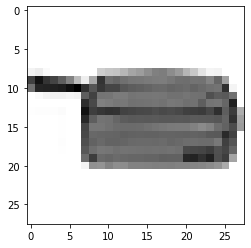

In [11]:
plot_image(torch.reshape(trial[6,:], (28,28)))

In [12]:
class autoencoder(nn.Module):
    def __init__(self, n_x):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(n_x, 300),
            nn.LeakyReLU(),
            nn.Linear(300, 100),
            nn.LeakyReLU(),
            nn.Linear(100, 50),
            nn.LeakyReLU(),
            nn.Linear(50, 25),
            nn.LeakyReLU()
            )
        self.decoder = nn.Sequential(
            nn.Linear(25, 50),
            nn.LeakyReLU(),
            nn.Linear(50, 100),
            nn.LeakyReLU(),
            nn.Linear(100, 300),
            nn.LeakyReLU(),
            nn.Linear(300, n_x),
            nn.Sigmoid()
            )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [52]:
batch_size = 500
learning_rate = 0.001
n_x = 784

model = autoencoder(n_x).to(device)
criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [53]:
num_epochs = 5
loss_list = []
for epoch in range(num_epochs):
  for mini_batch in dataloader:
    flattened_mini_batch = torch.reshape(mini_batch[0], (-1, 784)).to(device)
    #Forward
    output = model(flattened_mini_batch)

    #Loss
    loss = criterion(output, flattened_mini_batch)

    #Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Store loss for visualization
    loss_list.append(loss)

  for data in dataloader_test:
    flattened_mini_batch = torch.reshape(data[0], (-1, 784)).to(device)
    output = model(flattened_mini_batch)
    break

  loss_validation = criterion(output, flattened_mini_batch)
  print('epoch [{}/{}], loss:{:.4f}, loss_validation:{:.4f}'
          .format(epoch + 1, num_epochs, loss, loss_validation))
  # print('epoch [{}/{}], loss:{:.4f}'
  #         .format(epoch + 1, num_epochs, loss))


epoch [1/5], loss:0.2934, loss_validation:0.3088
epoch [2/5], loss:0.3012, loss_validation:0.2958
epoch [3/5], loss:0.2948, loss_validation:0.2914
epoch [4/5], loss:0.2861, loss_validation:0.2882
epoch [5/5], loss:0.2956, loss_validation:0.2857


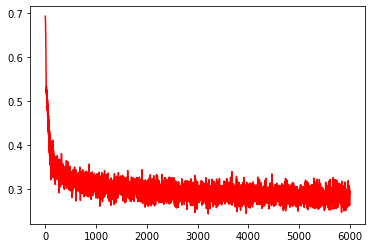

In [54]:
plt.plot(np.array(loss_list), 'r')

In [58]:
i = 8

In [59]:
test = model(torch.reshape(trial[i], (-1, 784)).to(device))

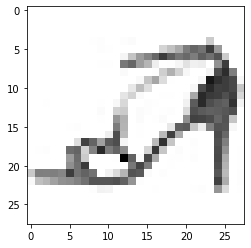

In [60]:
plot_image((torch.reshape(trial[i], (28,28))))

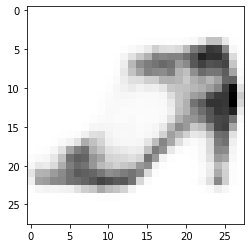

In [61]:
plot_image((torch.reshape(test, (28,28))).cpu().detach().numpy())

In [20]:
model.encoder(torch.reshape(trial[i], (-1, 784)).to(device))

tensor([[-2.8383e-02, -2.2689e-02,  4.2258e+00,  4.6544e+00,  6.5755e+00,
          1.4002e+00, -3.7790e-02, -5.3036e-02, -3.7934e-02,  3.5496e+00,
          1.2023e+01,  2.2671e+00,  4.2266e-01, -1.5837e-02,  4.8063e+00,
          5.4221e+00,  3.1873e+00, -8.2801e-02,  4.7393e+00, -3.7629e-03,
          5.4158e+00,  2.0521e+00,  1.4988e+00,  3.2075e+00,  5.0319e-01]],
       device='cuda:0', grad_fn=<LeakyReluBackward0>)

In [21]:
# generate_input = torch.rand((1,25), device=device)
generate_input = torch.FloatTensor(1,25).uniform_(-5, 5).to(device)

In [22]:
generate_input

tensor([[-1.9310,  2.7233, -2.9196, -0.0192, -1.1869, -4.7350,  4.4358, -4.7397,
          4.3646, -3.9623,  2.1721,  0.6008, -2.1063, -1.0334,  2.2304,  3.3243,
          2.6387, -2.9145,  0.0855, -4.8359,  4.0981, -3.8303, -0.7313, -4.5721,
         -3.4939]], device='cuda:0')

In [23]:
generate_output = model.decoder(generate_input)

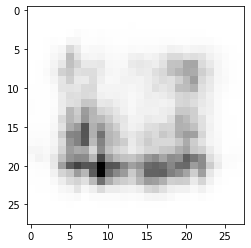

In [24]:
plot_image((torch.reshape(generate_output, (28,28))).cpu().detach().numpy())

In [43]:
for data in dataloader_test:
  flattened_mini_batch = torch.reshape(data[0], (-1, 784)).to(device)
  y_test = data[1]
  encoder_output = model.encoder(flattened_mini_batch)
  break

In [45]:
data[0].shape

torch.Size([10000, 1, 28, 28])

In [46]:
np.random.seed(42)

from sklearn.manifold import TSNE

tsne = TSNE()
X_valid_2D = tsne.fit_transform(encoder_output.cpu().detach().numpy())
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

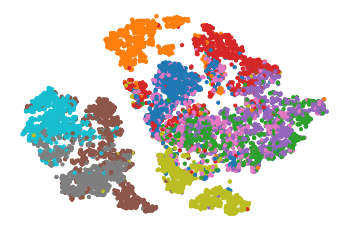

In [47]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_test, s=10, cmap="tab10")
plt.axis("off")
plt.show()

In [70]:
for name, param in model.encoder.named_parameters():
  print(name)
  print(param)

0.weight
Parameter containing:
tensor([[-0.1175, -0.1698, -0.2464,  ..., -0.0797, -0.1187, -0.0300],
        [ 0.0092,  0.0113, -0.0029,  ..., -0.1207, -0.1341, -0.0327],
        [-0.0102, -0.0862, -0.0673,  ..., -0.0347,  0.0723, -0.0091],
        ...,
        [-0.0348, -0.1337, -0.1276,  ..., -0.1483,  0.0050, -0.0808],
        [ 0.0209, -0.0109, -0.0383,  ..., -0.1251, -0.1094, -0.0761],
        [ 0.0007, -0.0267, -0.0270,  ..., -0.1268,  0.0028,  0.0221]],
       device='cuda:0', requires_grad=True)
0.bias
Parameter containing:
tensor([-6.8531e-02,  1.5775e-01,  1.1165e-01,  1.2922e-01,  6.7912e-03,
        -1.1727e-01,  8.5742e-02, -9.2399e-02,  1.2456e-01, -1.9333e-02,
        -6.9285e-02,  1.6978e-01,  6.2172e-02,  6.3652e-02,  1.8741e-01,
         4.0046e-01,  1.4091e-01, -4.7828e-02, -4.5897e-02,  2.0527e-02,
         6.5827e-02,  4.2041e-02,  4.4947e-03,  2.0443e-01,  1.9063e-01,
         2.4511e-02, -3.9686e-02,  8.8778e-02,  5.9035e-02,  1.8968e-01,
         4.5447e-02,  1.

In [71]:
class clf_model(nn.Module):
    def __init__(self, n_x):
        super(clf_model, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(n_x, 300),
            nn.LeakyReLU(),
            nn.Linear(300, 100),
            nn.LeakyReLU(),
            nn.Linear(100, 50),
            nn.LeakyReLU(),
            nn.Linear(50, 25),
            nn.LeakyReLU()
            )
        self.clf = nn.Sequential(
            nn.Linear(25, 10)
            )

    def forward(self, x):
        x = self.encoder(x)
        x = self.clf(x)
        return x

In [80]:
model_clf = clf_model(n_x).to(device)

In [81]:
model_clf

clf_model(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=300, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=300, out_features=100, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=50, out_features=25, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
  )
  (clf): Sequential(
    (0): Linear(in_features=25, out_features=10, bias=True)
  )
)

In [82]:
model_clf.encoder.load_state_dict(model.encoder.state_dict())

<All keys matched successfully>

In [83]:
for param in model_clf.encoder.parameters():
    param.requires_grad = False

In [84]:
criterion_clf = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_clf.parameters(), lr=learning_rate)

In [86]:
num_epochs = 5
loss_list = []
for epoch in range(num_epochs):
  for mini_batch in dataloader:
    flattened_mini_batch = torch.reshape(mini_batch[0], (-1, 784)).to(device)
    y = mini_batch[1].to(device)
    #Forward
    output = model_clf(flattened_mini_batch)

    #Loss
    loss = criterion_clf(output, y)

    #Backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Store loss for visualization
    loss_list.append(loss)

  for data in dataloader_test:
    flattened_mini_batch = torch.reshape(data[0], (-1, 784)).to(device)
    output = model_clf(flattened_mini_batch)
    y = data[1].to(device)
    break

  loss_validation = criterion(output, y)
  print('epoch [{}/{}], loss:{:.4f}, loss_validation:{:.4f}'
          .format(epoch + 1, num_epochs, loss, loss_validation))
  # print('epoch [{}/{}], loss:{:.4f}'
  #         .format(epoch + 1, num_epochs, loss))


epoch [1/5], loss:0.4842, loss_validation:0.5653
epoch [2/5], loss:0.7158, loss_validation:0.5616
epoch [3/5], loss:0.7565, loss_validation:0.5638
epoch [4/5], loss:0.5237, loss_validation:0.5577
epoch [5/5], loss:0.5142, loss_validation:0.5541


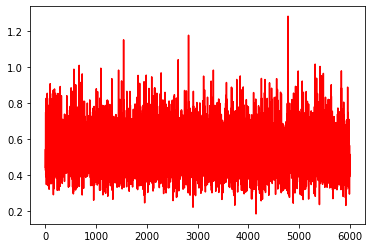

In [101]:
plt.plot(np.array(loss_list), 'r')

In [147]:
for data in dataloader:
  flattened_mini_batch = torch.reshape(data[0], (-1, 784)).to(device)
  y_test = data[1]
  encoder_output = model.encoder(flattened_mini_batch)
  break

In [148]:
flattened_mini_batch.shape

torch.Size([50, 784])

In [149]:
y_test.shape

torch.Size([50])

In [163]:
i = 40

In [164]:
torch.argmax(model_clf(flattened_mini_batch[i]))

tensor(2, device='cuda:0')

In [165]:
model_clf(flattened_mini_batch[i])

tensor([ -4.8097,  -8.7987,   5.6194,   0.7659,   4.0927, -15.1163,   5.1341,
        -27.1500,  -6.0378, -18.6792], device='cuda:0', grad_fn=<AddBackward0>)

In [166]:
y_test[i]

tensor(2)

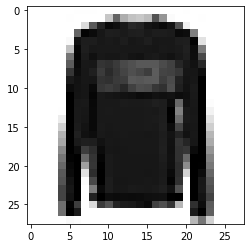

In [167]:
plot_image((torch.reshape(flattened_mini_batch[i], (28,28))).cpu().detach().numpy())